In [1]:
import os
os.environ['HTTP_PROXY'] = "http://127.0.0.1:10809"
os.environ['HTTPS_PROXY'] = "http://127.0.0.1:10809"

In [2]:
import geemap
import ee
Map=geemap.Map()
Map  

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

In [ ]:
visualization = {
    'bands': ['waterClass'],
    'min': 0.0,
    'max': 3.0,
    'palette': ['cccccc', 'ffffff', '99d9ea', '0000ff']
}

JRC_water = ee.Image("JRC/GSW1_2/YearlyHistory/2018")
Map.addLayer(JRC_wuhan_water, visualization, 'Water Class')

Text(0.5, 1.0, 'JRC waterbody datasets in 2018')

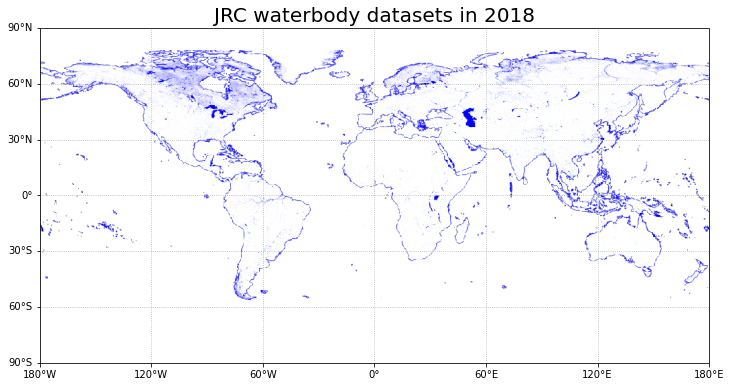

In [21]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee
region = [-180.0, -90.0, 180.0, 90.0] 
vis = {'bands': ['waterClass'], 'palette': ['cccccc', 'ffffff', '99d9ea', '0000ff'], 'min': 0.0, 'max': 3.0, 'opacity': 1.0}
fig = plt.figure(figsize=(12, 8))
# use cartoee to get a map
ax = cartoee.get_map(JRC_water, region=region, vis_params=vis)
# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60.0,30.0], linestyle=":")
ax.set_title(label = 'JRC waterbody datasets in 2018', fontsize=20)
# plt.show()

In [22]:
NLCD_water = ee.Image("COPERNICUS/Landcover/100m/Proba-V-C3/Global/2018").select('discrete_classification').eq(80).selfMask()
Map.addLayer(NLCD_water,{'palette': ['blue']},'nlcd_water')

Text(0.5, 1.0, 'COPERNICUS Landcover waterbody datasets in 2018')

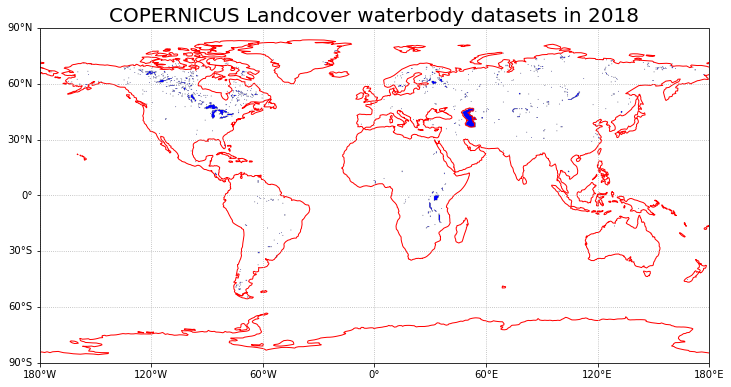

In [23]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
from geemap import cartoee
region = [-180.0, -90.0, 180.0, 90.0] 
vis = {'bands': ['discrete_classification'], 'palette': ['blue'], 'min': 1.0, 'max': 1.0, 'opacity': 1.0}
fig = plt.figure(figsize=(12, 8))
# use cartoee to get a map
ax = cartoee.get_map(NLCD_water, region=region, vis_params=vis)
# add gridlines to the map at a specified interval
cartoee.add_gridlines(ax, interval=[60.0,30.0], linestyle=":")
ax.coastlines(color="red")
ax.set_title(label = 'COPERNICUS Landcover waterbody datasets in 2018', fontsize=20)
# plt.show()